# sqlalchemy-challenge
    by Diane Scherpereel 
    October 2019

In [134]:
# Import Matplotlib and associated items
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as pyplot

In [135]:
# Import other Dependencies
import datetime as dt
import numpy as np
import pandas as pd

# Reflect Tables into SQLAlchemy ORM

In [136]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [137]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [138]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [139]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [140]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [141]:
# Create our session (link) from Python to the DB
session = Session(engine)
conn = engine.connect()

# Exploratory Climate Analysis

In [132]:
# Designed a query to retrieve the last 12 months of precipitation data using ALL data
all_data = pd.read_sql("SELECT date, prcp AS 'precipitation' \
FROM Measurement WHERE date >= '2016-08-23'", conn)
# Preview the Data
all_data.head()


,date,precipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


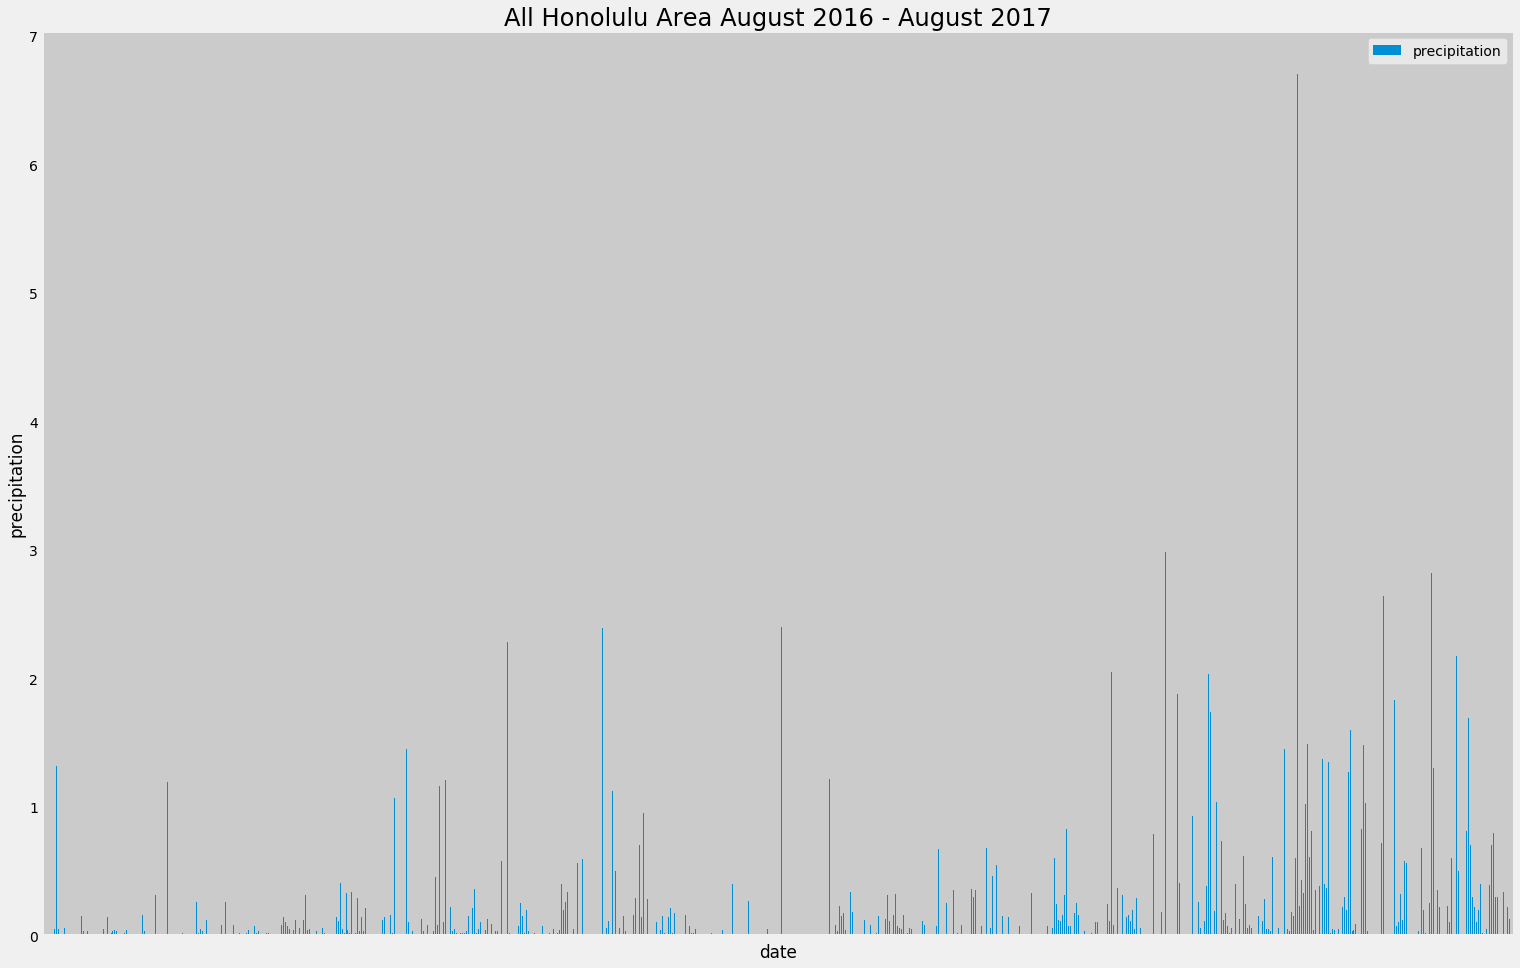

In [183]:
# Plot the data
xlabels = ('')
ax = all_data.plot.bar(x='date', y='precipitation')
ax.set_title("All Honolulu Area August 2016 - August 2017", fontsize='xx-large')
ax.set_ylabel("precipitation")
ax.set_xticklabels(xlabels)
fig = pyplot.gcf()
fig.set_size_inches(23.5, 15.5)

In [77]:
# Summary statistics for all the data
all_data.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [131]:
# The charge was to: Design a query to retrieve the last 12 months of precipitation data 
# and plot the results.
# I noticed we have data from more than one station.
# How many stations are there in the last 12 months of data? This shows 7.
data_test = engine.execute("SELECT DISTINCT station FROM Measurement \
WHERE date >= '2016-08-23'")
for station in data_test:
    print(station)
    

('USC00519397',)
('USC00513117',)
('USC00514830',)
('USC00517948',)
('USC00519523',)
('USC00519281',)
('USC00516128',)


I decided to plot each of the 7 stations over the last year so I can decide which is the least rainy place to go visit.


# Station USC00519397 Waikiki
date & precipitation for most recent year of data

In [124]:
# Station USC00519397 WAIKIKI
date_precipitation_397 = pd.read_sql("SELECT date, prcp AS 'precipitation' \
FROM Measurement WHERE station = 'USC00519397' AND date >= '2016-08-23'", conn)

# Preview the Data
date_precipitation_397.head()

,date,precipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


[]

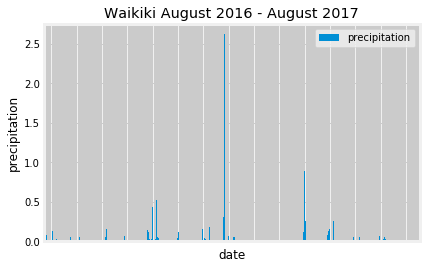

In [125]:
# Create a bar graph to show the precipation by date
# Station USC00519397 WAIKIKI
xlabels = ('')
ax = date_precipitation_397.plot.bar(x='date', y='precipitation', rot = 45)
ax.set_title("Waikiki August 2016 - August 2017")
ax.set_ylabel("precipitation")
ax.set_xticklabels(xlabels)

In [126]:
# Find the summary statistics for Waikiki August 2016-August 2017
summary_statistics_waikiki = pd.read_sql("SELECT MAX(prcp) AS 'maximum_precipitation', \
MIN(prcp) AS 'minimum_precipitation', \
AVG(prcp) AS 'average_precipitation', \
COUNT(prcp) AS 'count' \
FROM Measurement \
WHERE station = 'USC00519397' AND date >= '2016-08-23'", conn)
summary_statistics_waikiki

,maximum_precipitation,minimum_precipitation,average_precipitation,count
0,2.62,0.0,0.044819,359


In [128]:
# Find a date on which the minimum precipitation for Waikiki occurred in the last year
# This will help me decide what time of year I want to go on the trip.
min_data_precipitation_397 = pd.read_sql("SELECT date, MIN(prcp) AS 'minimum_precipitation' \
FROM Measurement WHERE station = 'USC00519397' AND date >= '2016-08-23'", conn)
min_data_precipitation_397

,date,minimum_precipitation
0,2016-08-23,0.0


In [129]:
# Find the date on which the maximum precipitation for Waikiki occurred in the last year
# This will help me decide what time of year I want to avoid.
max_data_precipitation_397 = pd.read_sql("SELECT date, MAX(prcp) AS 'maximum_precipitation' \
FROM Measurement WHERE station = 'USC00519397' AND date >= '2016-08-23'", conn)
max_data_precipitation_397

,date,maximum_precipitation
0,2017-02-12,2.62


# Station USC00514830 Kualoa Ranch Headquarters
date & precipitation for most recent year of data

In [121]:
# Station USC00514830 KUALOA RANCH HEADQUARTERS
date_precipitation_830 = pd.read_sql("SELECT date, prcp AS 'precipitation' \
FROM Measurement WHERE station = 'USC00514830' AND date >= '2016-08-23'", conn)
# Preview the Data
date_precipitation_830.head()

,date,precipitation
0,2016-08-23,0.05
1,2016-08-24,2.28
2,2016-08-25,0.00
3,2016-08-26,0.02
4,2016-08-27,0.02


[]

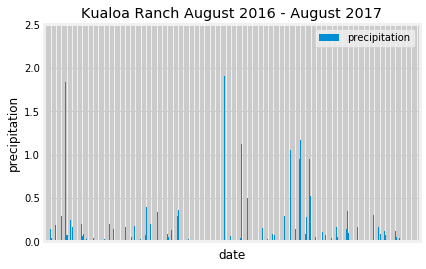

In [122]:
# Create a bar graph to show the precipation by date
# Station USC00514830 KUALOA RANCH HEADQUARTERS
xlabels = ('')
ax = date_precipitation_830.plot.bar(x='date', y= 'precipitation', rot = 45)
ax.set_title("Kualoa Ranch August 2016 - August 2017")
ax.set_ylabel("precipitation")
ax.set_xticklabels(xlabels)

In [123]:
# Find the summary statistics for Kualoa Ranch August 2016-August 2017
summary_statistics_kualoa = pd.read_sql("SELECT MAX(prcp) AS 'maximum_precipitation', \
MIN(prcp) AS 'minimum_precipitation', \
AVG(prcp) AS 'average_precipitation', \
COUNT(prcp) AS 'count' \
FROM Measurement \
WHERE station = 'USC00514830' AND date >= '2016-08-23'", conn)
summary_statistics_kualoa

,maximum_precipitation,minimum_precipitation,average_precipitation,count
0,2.39,0.0,0.125434,265


# Station USC00519523 Waimanalo Experimental Farm
date & precipitation for most recent year of data

In [118]:
# Station USC00519523
date_precipitation_523 = pd.read_sql("SELECT date, prcp AS 'precipitation' \
FROM Measurement WHERE station = 'USC00519523' AND date >= '2016-08-23'", conn)
# Preview the Data
date_precipitation_523.head()

,date,precipitation
0,2016-08-23,0.02
1,2016-08-24,1.22
2,2016-08-25,0.21
3,2016-08-26,0.00
4,2016-08-27,0.00


[]

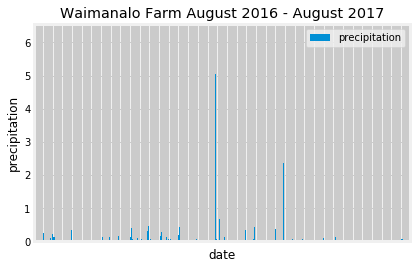

In [119]:
# Create a bar graph to show the precipation by date
# Station USC00519523
xlabels = ('')
ax = date_precipitation_523.plot.bar(x='date', y='precipitation', rot = 45)
ax.set_title("Waimanalo Farm August 2016 - August 2017")
ax.set_ylabel("precipitation")
ax.set_xticklabels(xlabels)

In [120]:
# Find the summary statistics for Waimanalo August 2016-August 2017
summary_statistics_waimanalo = pd.read_sql("SELECT MAX(prcp) AS 'maximum_precipitation', \
MIN(prcp) AS 'minimum_precipitation', \
AVG(prcp) AS 'average_precipitation', \
COUNT(prcp) AS 'count' \
FROM Measurement \
WHERE station = 'USC00519523' AND date >= '2016-08-23'", conn)
summary_statistics_waimanalo
# That was a big rainfall on one day!

,maximum_precipitation,minimum_precipitation,average_precipitation,count
0,6.25,0.0,0.121051,314


# Station USC00516128 Manoa Lyon
date & precipitation for most recent year of data

In [114]:
# Station USC00516128 MANOA LYON ARBORETUM
date_precipitation_128 = pd.read_sql("SELECT date, prcp AS 'precipitation' \
FROM Measurement WHERE station = 'USC00516128' AND date >= '2016-08-23'", conn)
# Preview the Data
date_precipitation_128.head()

,date,precipitation
0,2016-08-23,0.70
1,2016-08-24,1.45
2,2016-08-25,0.11
3,2016-08-27,NaN
4,2016-08-28,2.07


[]

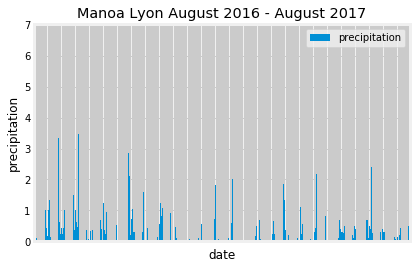

In [115]:
# Create a bar graph to show the precipation by date
# Station USC00516128 MANOA LYON ARBORETUM
xlabels = ('')
ax = date_precipitation_128.plot.bar(x='date', y='precipitation', rot=45)
ax.set_title("Manoa Lyon August 2016 - August 2017")
ax.set_ylabel("precipitation")
ax.set_xticklabels(xlabels)

In [116]:
# Find the summary statistics for Manoa Lyon Arboretum August 2016-August 2017
summary_statistics_manoa = pd.read_sql("SELECT MAX(prcp) AS 'maximum_precipitation', \
MIN(prcp) AS 'minimum_precipitation', \
AVG(prcp) AS 'average_precipitation', \
COUNT(prcp) AS 'count' \
FROM Measurement \
WHERE station = 'USC00516128' AND date >= '2016-08-23'", conn)
summary_statistics_manoa
# This was the largest rainfall in one day from August 2016 to August 2017.

,maximum_precipitation,minimum_precipitation,average_precipitation,count
0,6.7,0.0,0.45064,328


In [130]:
# Find date for max_precipitation
max_precipitation_manoa = pd.read_sql("SELECT date, MAX(prcp) AS 'maximum_precipitation' \
FROM Measurement \
WHERE station = 'USC00516128' AND date >= '2016-08-23'", conn)
max_precipitation_manoa
# It looks like I might not want to go in September!

,date,maximum_precipitation
0,2016-09-14,6.7


# Station USC00513117 Kaneohe
date & precipitation for most recent year of data

In [113]:
# Station USC00513117 KANEOHE
date_precipitation_117 = pd.read_sql("SELECT date, prcp AS 'precipitation' \
FROM Measurement WHERE station = 'USC00513117' AND date >= '2016-08-23'", conn)
# Preview the Data
date_precipitation_117.head()

,date,precipitation
0,2016-08-23,0.15
1,2016-08-24,2.15
2,2016-08-25,0.08
3,2016-08-26,0.03
4,2016-08-27,0.18


[]

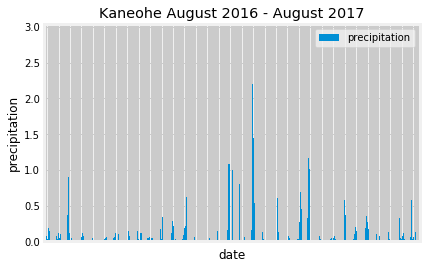

In [105]:
# Create a bar graph to show the precipation by date
# Station USC00513117 KANEOHE
xlabels = ('')
ax = date_precipitation_117.plot.bar(x='date', y='precipitation', rot=45)
ax.set_title("Kaneohe August 2016 - August 2017")
ax.set_ylabel("precipitation")
ax.set_xticklabels(xlabels)

In [106]:
# Find the summary statistics for Kaneohe August 2016-August 2017
summary_statistics_kaneohe = pd.read_sql("SELECT MAX(prcp) AS 'maximum_precipitation', \
MIN(prcp) AS 'minimum_precipitation', \
AVG(prcp) AS 'average_precipitation', \
COUNT(prcp) AS 'count' \
FROM Measurement \
WHERE station = 'USC00513117' AND date >= '2016-08-23'", conn)
summary_statistics_kaneohe

,maximum_precipitation,minimum_precipitation,average_precipitation,count
0,2.9,0.0,0.141429,343


# Station USC00517948 Pearl City
date & precipitation for most recent year of data

In [107]:
# Station USC00517948 PEARL CITY
date_precipitation_948 = pd.read_sql("SELECT date, prcp AS 'precipitation' \
FROM Measurement WHERE station = 'USC00517948' AND date >= '2016-08-23'", conn)
# Preview the Data
date_precipitation_948.head()

,date,precipitation
0,2016-08-23,NaN
1,2016-08-24,NaN
2,2016-08-25,0.00
3,2016-08-26,0.04
4,2016-08-29,NaN


[]

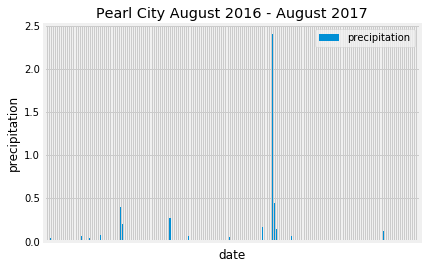

In [108]:
# Create a bar graph to show the precipation by date
# Station USC00517948 PEARL CITY
xlabels =('')
ax = date_precipitation_948.plot.bar(x='date', y='precipitation', rot=45)
ax.set_title("Pearl City August 2016 - August 2017")
ax.set_ylabel("precipitation")
ax.set_xticklabels(xlabels)

In [109]:
# Find the summary statistics for Pearl City August 2016-August 2017
summary_statistics_pearl_city = pd.read_sql("SELECT MAX(prcp) AS 'maximum_precipitation', \
MIN(prcp) AS 'minimum_precipitation', \
AVG(prcp) AS 'average_precipitation', \
COUNT(prcp) AS 'count' \
FROM Measurement \
WHERE station = 'USC00517948' AND date >= '2016-08-23'", conn)
summary_statistics_pearl_city

,maximum_precipitation,minimum_precipitation,average_precipitation,count
0,2.4,0.0,0.0765,60


# Station USC00519281 Waihee
date & precipitation for most recent year of data

In [110]:
# Station USC00519281 WAIHEE
date_precipitation_281 = pd.read_sql("SELECT date, prcp AS 'precipitation' \
FROM Measurement WHERE station = 'USC00519281' AND date >= '2016-08-23'", conn)
# Preview the Data
date_precipitation_281.head()

,date,precipitation
0,2016-08-23,1.79
1,2016-08-24,2.15
2,2016-08-25,0.06
3,2016-08-26,0.01
4,2016-08-27,0.12


[]

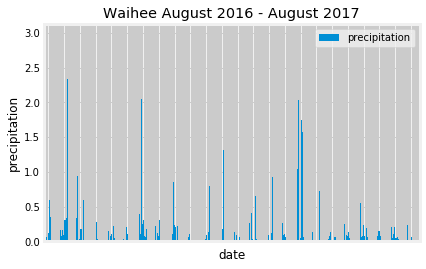

In [111]:
# Create a bar graph to show the precipation by date
# Station USC00519281 WAIHEE
xlabels =('')
ax = date_precipitation_281.plot.bar(x='date', y='precipitation', rot=45)
ax.set_title("Waihee August 2016 - August 2017")
ax.set_ylabel("precipitation")
ax.set_xticklabels(xlabels)

In [112]:
# Find the summary statistics for Waihee August 2016-August 2017
summary_statistics_waihee = pd.read_sql("SELECT MAX(prcp) AS 'maximum_precipitation', \
MIN(prcp) AS 'minimum_precipitation', \
AVG(prcp) AS 'average_precipitation', \
COUNT(prcp) AS 'count' \
FROM Measurement \
WHERE station = 'USC00519281' AND date >= '2016-08-23'", conn)
summary_statistics_waihee

,maximum_precipitation,minimum_precipitation,average_precipitation,count
0,2.98,0.0,0.198949,352


In [43]:
# Their graph for reference


![precipitation](Images/precipitation.png)

In [44]:
# Their summary statistics for reference

![describe](Images/describe.png)

# Number of stations in the dataset

In [45]:
# Designed a query to show how many stations are available in this dataset?
data_stations = engine.execute("SELECT DISTINCT station FROM Measurement")
count = 0
for station in data_stations:
    count += 1
    print(station)
print("There are", count, "stations available in this dataset.")


('USC00519397',)
('USC00513117',)
('USC00514830',)
('USC00517948',)
('USC00518838',)
('USC00519523',)
('USC00519281',)
('USC00511918',)
('USC00516128',)
There are 9 stations available in this dataset.


# Most Active Stations

In [47]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
most_active_stations = session.query(Measurement.station, func.count(Measurement.tobs)).\
    group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

# Maximum Temperature, Minimum Temperature, Average Temperature for the most active station, Waihee (USC00519281), for the last year of data:

In [142]:
# Using the station id from the previous query('USC00519281' which is Waihee), 
# calculate the lowest temperature recorded, highest temperature recorded, 
# and average temperature of the most active station.
# Calculated based on the last year of data only:

temps_of_most_active_station = pd.read_sql("SELECT MAX(tobs) AS 'maximum_temperature', \
MIN(tobs) AS 'minimum_temperature', \
AVG(tobs) AS 'average_temperature' \
FROM Measurement \
WHERE station = 'USC00519281' AND date >= '2016-08-23'", conn)
temps_of_most_active_station

,maximum_temperature,minimum_temperature,average_temperature
0,83.0,59.0,73.107955


# Maximum Temperature, Minimum Temperature, Average Temperature for the most active station, Waihee (USC00519281), including all data:

In [143]:
# Using the station id from the previous query('USC00519281' which is Waihee), 
# calculate the lowest temperature recorded, highest temperature recorded, 
# and average temperature of the most active station.
# Calculated based all the data:

temps_of_most_active_station = pd.read_sql("SELECT MAX(tobs) AS 'maximum_temperature', \
MIN(tobs) AS 'minimum_temperature', \
AVG(tobs) AS 'average_temperature' \
FROM Measurement \
WHERE station = 'USC00519281'", conn)
temps_of_most_active_station

,maximum_temperature,minimum_temperature,average_temperature
0,85.0,54.0,71.663781


# Waihee Temperature Observations 
# August 2016 to August 2017

In [159]:
# Choose the station with the highest number of temperature observations, 
# which is Waihee (USC00519281).
# Query the last 12 months of temperature observation data for this station

waihee_temps_last_12_months = pd.read_sql("SELECT date, tobs AS 'Temperature Observations' \
FROM Measurement \
WHERE station = 'USC00519281' AND date >= '2016-08-23'", conn)
waihee_temps_last_12_months.head()

,date,Temperature Observations
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0


Text(0.5, 1.05, 'Waihee: August 2016-August 2017')

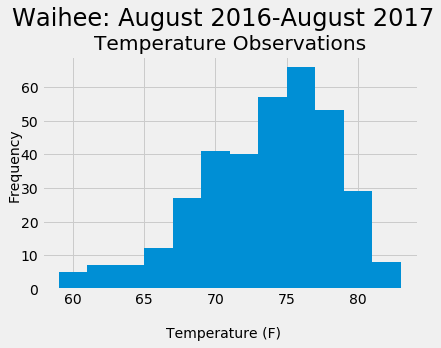

In [182]:
# Plot the results as a histogram using 12 bins and adding a title and x and y labels
fig, axes = pyplot.subplots(sharey=True)
waihee_temps_last_12_months.hist(bins=12, ax=axes)
fig.text(0.5, -0.1, 'Temperature (F)', ha='center')
fig.text(0, 0.5, 'Frequency', va='center', rotation='vertical')
pyplot.suptitle('Waihee: August 2016-August 2017', x=0.5, y=1.05, ha='center', fontsize='xx-large')

In [54]:
# Their histogram for reference

![precipitation](Images/station-histogram.png)

In [55]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [56]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [57]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [58]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [59]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [60]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [61]:
# Load the previous query results into a Pandas DataFrame and 
# add the `trip_dates` range as the `date` index


In [62]:
# Plot the daily normals as an area plot with `stacked=False`
